# Agenda
Spectral clustering of GPs' bitmaps.



In [1]:
# Installing Libraries (if not installed)
#!pip3 install jupyterlab-git
#!pip3 install matplotlib
#!pip3 install scikit-learn
#!pip3 install seaborn
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install so4gp
#!pip3 install scipy
#!pip3 install sympy

# Import libraries <a name="lib-import"></a>

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import sympy
import scipy


from scipy.sparse import csgraph, csr_matrix
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, completeness_score,v_measure_score
from numpy import linalg as la

In [3]:
import so4gp as sgp

# Spectral Clustering

Adopted from: [Towards data science](https://towardsdatascience.com/graph-laplacian-and-its-application-in-machine-learning-7d9aab021d16)

## Data set
Data set is the GP bitmaps (X0, X1, ..., Xn). Each attribute generates a GP bitmap.

In [5]:
ds = sgp.DataGP('data\DATASET.csv')

data_size = ds.row_count
features = np.array(ds.data, dtype=np.float64)
features

array([[30.,  3.,  1., 10.,  2.,  4.],
       [35.,  2.,  2.,  8.,  2.,  4.],
       [40.,  4.,  2.,  7.,  2.,  4.],
       [50.,  1.,  1.,  6.,  2.,  4.],
       [52.,  7.,  1.,  2.,  2.,  4.]])

In [6]:
bm_matrix = []
for i in ds.attr_cols:
    bm = sgp.gibitmap(ds, i)
    bm_matrix.append(bm)
    
bm_matrix = np.array(bm_matrix, dtype=int)

In [19]:
X = features[:, 0:2]
X

array([[30.,  3.],
       [35.,  2.],
       [40.,  4.],
       [50.,  1.],
       [52.,  7.]])

## Train similirity labels

In [33]:
# X_train (2 features at a time)
X_train = np.zeros((data_size, data_size))

for i in range(data_size):
    for j in range(data_size):
        if (X[i][0] > X[j][0]) and (X[i][1] > X[j][1]):
            X_train[i][j] = 1
            X_train[j][i] = 1
        #elif (X[i][0] > X[j][0]) and (X[i][1] < X[j][1]):
        #    X_train[i][j] = -1
        #    X_train[i][j] = -1
X_train

array([[0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 0.]])

In [40]:
# X_train (2 features at a time)
X_train = np.zeros((data_size, data_size))

for i in range(data_size):
    for j in range(data_size):
        if (X[i][0] > X[j][0]) and (X[i][1] > X[j][1]):
            X_train[i][j] = 1
            X_train[j][i] = 1
        elif (X[i][0] > X[j][0]) and (X[i][1] < X[j][1]):
            X_train[i][j] = -1
            X_train[i][j] = -1
X_train
y_train = np.array([1,1,0,1,0], dtype=int)
y_train

array([1, 1, 0, 1, 0])

[2 2 1 0 1]


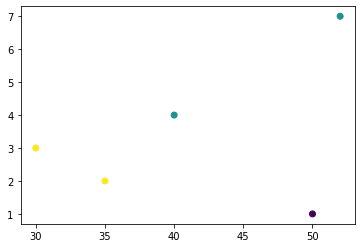

In [42]:
# Training
# Using KMeans clustering (NOT VERY  ACCURATE)
num_clusters = 3
kmean_labels = KMeans(n_clusters=num_clusters).fit_predict(X_train)
print(kmean_labels)

plt.scatter(X[:,0], X[:,1], c=kmean_labels.astype(float))
#plt.scatter(X[:,0], X[:,1], c=y_train.astype(float))

plt.show()